In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [ ]:
#Proses input data csv ke colab
df = pd.read_csv('hepatitis_csv.csv')
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              155 non-null    int64 
 1   sex              155 non-null    object
 2   steroid          154 non-null    object
 3   antivirals       155 non-null    bool  
 4   fatigue          154 non-null    object
 5   malaise          154 non-null    object
 6   anorexia         154 non-null    object
 7   Liver_big        145 non-null    object
 8   Liver_firm       144 non-null    object
 9   spleen_palpable  150 non-null    object
 10  spiders          150 non-null    object
 11  ascites          150 non-null    object
 12  varices          150 non-null    object
 13  histology        155 non-null    bool  
 14  class            155 non-null    object
dtypes: bool(2), int64(1), object(12)
memory usage: 16.2+ KB


In [ ]:
#Proses Penghapussan NaN
df = df.dropna()
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,Liver_big,Liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,False,Tidak Kronis
1,50,female,False,False,True,False,False,False,False,False,False,False,False,False,Tidak Kronis
2,78,female,True,False,True,False,False,True,False,False,False,False,False,False,Tidak Kronis
4,34,female,True,False,False,False,False,True,False,False,False,False,False,False,Tidak Kronis
5,34,female,True,False,False,False,False,True,False,False,False,False,False,False,Tidak Kronis
6,51,female,False,False,True,False,True,True,False,True,True,False,False,False,Kronis
7,23,female,True,False,False,False,False,True,False,False,False,False,False,False,Tidak Kronis
8,39,female,True,False,True,False,False,True,True,False,False,False,False,False,Tidak Kronis
9,30,female,True,False,False,False,False,True,False,False,False,False,False,False,Tidak Kronis
10,39,female,False,True,False,False,False,False,True,False,False,False,False,False,Tidak Kronis


In [ ]:
#Proses penglabelan
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 

In [ ]:
df['steroid'] = le.fit_transform(df['steroid']) 
df['antivirals'] = le.fit_transform(df['antivirals']) 
df['fatigue'] = le.fit_transform(df['fatigue']) 
df['malaise'] = le.fit_transform(df['malaise']) 
df['anorexia'] = le.fit_transform(df['anorexia']) 
df['Liver_big'] = le.fit_transform(df['Liver_big']) 
df['Liver_firm'] = le.fit_transform(df['Liver_firm']) 
df['spleen_palpable'] = le.fit_transform(df['spleen_palpable'])
df['spiders'] = le.fit_transform(df['spiders'])
df['ascites'] = le.fit_transform(df['ascites'])
df['varices'] = le.fit_transform(df['varices'])
df['varices'] = le.fit_transform(df['varices'])
df['histology'] = le.fit_transform(df['histology'])
df['kondisi'] = le.fit_transform(df['class'])

df.head()

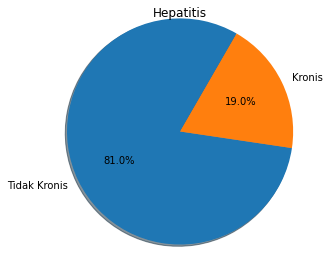

In [ ]:
#Memvisualisasikan kelas label dengan diagram pie
Kondisi = [ np.count_nonzero(df['kondisi']==1),np.count_nonzero(df['kondisi']==0)]
hasil = ['Tidak Kronis','Kronis']
plt.title('Hepatitis')
plt.pie(Kondisi,labels=hasil, radius=1.3, startangle=60, autopct='%.1f%%', shadow=True)
plt.show()

In [ ]:
#proses drop data yang tidak diperlukan
df.drop (['age','sex','class'],inplace=True,axis=1)

In [ ]:
#menambahkan fitur sebagai x dan mendefinisikan y
x = df[['steroid','antivirals','fatigue','malaise','anorexia','Liver_big','Liver_firm','spleen_palpable','spiders','ascites','varices','histology']].values
y = df['kondisi'].values

In [ ]:
#melakukan split data training  sebesar 90% dan testing 10% dari data x yang terstandarisasi dan data y
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [ ]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print ('coefficients (b) : ', LR.coef_)
print ('Intercept (a) : ',LR.intercept_)

coefficients (b) :  [[ 0.30421332 -0.02377014 -0.27666352 -0.37251069  0.27788974 -0.26399573
   0.30816625 -0.31677175 -0.75320038 -0.50348666 -0.3890227  -0.23982691]]
Intercept (a) :  [2.00989075]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ypred = LR.predict(x_test)
print("Akurasi terstandarisasi ", accuracy_score(y_test, ypred)*100)

Akurasi terstandarisasi  93.33333333333333


In [ ]:
from sklearn.metrics import log_loss

yhat_prob = LR.predict_log_proba(x_test)
print ('Log Loss : ', log_loss (y_test,ypred))

Log Loss :  2.302585092994046


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
tn,fp,fn,tp = confusion_matrix(y_test,ypred).ravel()
accuracy_score = (tn+tp)/(tn+fp+fn+tp)
print(accuracy_score)

0.9333333333333333


**PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
x_pca = df.loc[:,'steroid':'histology'].values 
x_pca

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 0, 1]])

In [ ]:
pca1 = PCA(n_components=2) 

In [ ]:
pca1.fit(x_pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
pc = pca1.transform(x_pca) 

In [ ]:
principalDf = pd.DataFrame(data = pc , columns = ['pc1','pc2']) 

In [ ]:
df_pca = pd.concat([principalDf, df[['kondisi']]], axis = 1)


In [ ]:
df_pca.head()

,pc1,pc2,kondisi
0,-0.782926,-0.213026,1.0
1,-0.347108,-0.451811,1.0
2,-0.669360,-0.138665,1.0
3,-1.105178,0.100120,NaN
4,-1.105178,0.100120,1.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(principalDf.values, y.ravel(), test_size=0.4, random_state=0)

In [ ]:
LR_pca = LogisticRegression().fit(X_train,y_train)

In [ ]:
yhat_pca = LR_pca.predict(X_test)

In [ ]:
LR_pca.coef_

array([[-1.36201282, -0.72214049]])

In [ ]:
LR_pca.intercept_

array([1.58011337])

In [ ]:
#melakukan visualisasi hasil prediksi data testing
fig=plt.figure(figsize = (8,8))
a = LR_pca.intercept_
b1,b2 =LR_pca.coef_.T

<Figure size 576x576 with 0 Axes>

In [ ]:
#calculate intercept dan gradien 
c=-a/b2
m=-b1/b2

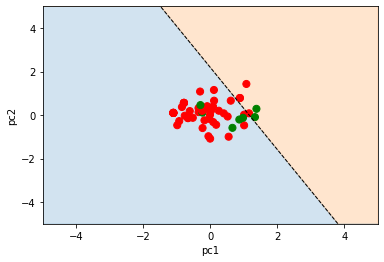

In [ ]:
#
xmin,xmax=-5,5
ymin,ymax=-5,5

xd = np.array([xmin,xmax])
yd = m*xd + c                     #membuat perasamaan garis pembatasnya
plt.plot(xd,yd,'k',lw=1,ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd,yd,ymax,color='tab:orange',alpha=0.2)

color = ['g','r']

colormap = np.array([color[0],color[1]])

plt.scatter(X_test[:,0], X_test[:,1], s=50, c=colormap[y_test])
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.ylabel(r'pc2')
plt.xlabel(r'pc1')
plt.show()

ValueError: ignored

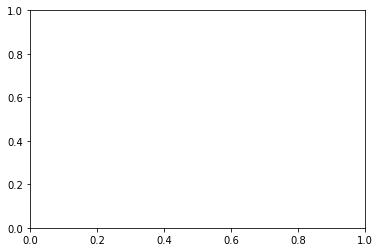

In [ ]:
#visualisasi hasil logistic regression pada data testing tanpa menggunakan decision boundary

colors = ['g','r']

colormap =np.array([colors[0],colors[1]])
plt.scatter(X_train[:,0], X_train[:,1], s=50, c=colormap[yhat_pca])
plt.title('HASIL LOG REG ')
plt.show()